In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False

In [248]:
%config InlineBackend.figure_format = 'svg'

### 1. 商业模式

1. B2B：商家对商家（企业卖家对企业买家），交易双方都是企业，最典型的案例就是阿里巴巴，汇聚了各行业的供应商，特点是订单量一般较大。
2. B2C：商家对个人（企业卖家对个人买家），例如：唯品会，聚美优品。
3. B2B2C：商家对商家对个人，例如：天猫、京东。
4. C2C：个人（卖家）对个人（买家），例如：淘宝、人人车。
5. O2O：线上（售卖）到线下（提货），将线下的商务机会与互联网结合，让互联网成为线下交易的平台，让消费者在享受线上优惠价格的同时，又可享受线下贴心的服务，例如：美团、苏宁易购、大众点评。
6. C2B：个人对商家（个人买家对企业卖家），先有消费者提出需求，后有商家按需求组织生产，例如：尚品宅配。
7. 其他：ABC（代理-商家-消费者）、F2C（工厂-个人）、B2G（政府采购）、BoB（供应商-运营者-采购商）、SoLoMo（社交-本地化-移动端）……

### 2. 电商网站核心指标：

1. 复购率和回购率

    - 复购率：复购（某段时间有2次及以上购买行为）用户的占比。复购率能反映用户的忠诚度，监测周期一般较长。
    - 回购率：回购率一般监测周期较短，可以反映如短期促销活动对用户的吸引力。

2. 用户交易常用指标

    - 访问次数（PV）：一定时间内某个页面的浏览次数。
    - 访问人数（UV）：一定时间内访问某个页面的人数。
    - 加购数：将某款商品加入到购物车的用户数。
    - 收藏数：收藏某款商品的用户数。
    - GMV（总交易额、成交总额）：Gross Merchandise Volume，通常称之为“交易流水”。
    - 客单价（ARPU）：“$ 总收入 / 总用户数 $”，某些平台也用ARPPU表示客单价。
    - 转化率：“$ 付费用户数 / 访客数 $”。
    - 折扣率：“$ 销售额 / 吊牌总额 $”，其中吊牌总额为：“$ 吊牌价 \times 销量 $”。
    - 拒退量：拒收和退货的总数量。
    - 拒退额：拒收和退货的总金额。
    - 实际销售额：“$ 销售额 - 拒退额 $”。

3. 商品管理常用指标

    - SPU数：Standard Product Unit，商品的基本信息。
    - SKU数：Standard Keeping Unit，商品的库存信息。
    - 售卖比：“$ GMV / 备货值 $”，了解商品流转情况，可以用于库存优化。
    - 动销率：“$ 有销量的SKU数 / 在售SKU数 $”。

### 3. 常用模型
1. RFM模型

RFM模型是使用得较为广泛的客户关系管理分析模式。RFM模型是衡量客户价值和客户创利能力的重要工具和手段，通过一个客户的近期购买行为、购买的频率以及花钱的多少三项指标来描述该客户的价值状况。

在RFM模式中，R（Recency）表示客户最近一次购买的时间有多远，F（Frequency）表示客户在最近一段时间内购买的次数，M（Monetary）表示客户在最近一段时间内购买的金额。RFM模型强调以客户的行为来区分客户。利用RFM分析，我们可以做以下几件事情：

1. 建立会员金字塔，区分各个级别的会员，如高级会员、中级会员、低级会员，然后针对不同级别的会员施行不同的营销策略，制定不同的营销活动。
2. 发现流失及休眠会员，通过对流失及休眠会员的及时发现，采取营销活动，激活这些会员。
3. 在短信、EDM（Email Direct Marketing）促销中，可以利用模型，选取最优会员。
4. 维系老客户，提高会员的忠诚度。

在使用RFM模型时，可以给三个变量不同的权重或按一定的规则进行分组，然后组合三个变量，分出不同级别的会员。

In [249]:
df = pd.read_excel('../files/data/某电商网站订单数据.xlsx', index_col = 'id')
df

,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,,
1,sys-2018-254118088,user-157213,PR000064,272.51,272.51,渠道-0396,APP,2018-02-14 12:20:36,2019-02-28 13:38:41,否
2,sys-2018-263312190,user-191121,PR000583,337.93,337.93,渠道-0765,Wech atMP,2018-08-14 09:40:34,2019-01-01 14:47:14,是
3,sys-2018-188208169,user-211918,PR000082,905.68,891.23,渠道-0530,We c hatMP,2018-11-02 20:17:25,2019-01-19 20:06:35,否
4,sys-2018-203314910,user-201322,PR000302,786.27,688.88,渠道-0530,WEB,2018-11-19 10:36:39,2019-08-07 12:24:35,否
5,sys-2018-283989279,user-120872,PR000290,550.77,542.51,渠道-9527,APP,2018-12-26 11:19:16,2019-10-01 07:42:43,否
...,...,...,...,...,...,...,...,...,...,...
104553,sys-2020-268392025,user-182189,PR000082,186.37,126.21,渠道-0568,Wech atMP,2020-01-01 23:30:57,2020-01-01 23:31:09,否
104554,sys-2020-213140521,user-170057,PR000603,138.81,138.81,渠道-0007,APP,2020-01-01 23:31:26,2020-01-01 23:31:36,否
104555,sys-2020-274536228,user-156592,PR000405,2632.27,2632.27,渠道-0985,Wech atMP,2020-01-01 23:46:56,2020-01-01 23:47:06,否


In [250]:
# 1. 提取2019年的订单数据
# 添加year列
# df['year'] = df['orderTime'].dt.year
# # 将列year设为索引列便于查询
# df.set_index('year')
# df = df.loc[2019]
# df
from datetime import datetime
start = datetime(2019,1,1)
end = datetime(2019,12,31,23,59,59)
df.drop(index = df[df.orderTime < start].index,inplace = True)
df.drop(index = df[df.orderTime > end].index,inplace = True)
df

,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否
...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,We c hatMP,2019-12-31 23:32:55,2019-12-31 23:33:06,否
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,APP,2019-12-31 23:33:05,2019-12-31 23:34:36,是
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,WE B,2019-12-31 23:37:30,2019-12-31 23:37:44,否


In [251]:
# 2. 处理业务流程不符的数据（支付时间早于下单时间、支付时长超过30分钟、订单金额小于0、支付金额小于0）
time = df['payTime'] - df['orderTime']
# 支付时间超过30分钟 | 支付天数大于1 | 订单金额小于0 | 支付金额小于0
df = df[~((time.dt.seconds > 1800) | (time.dt.days > 0) | (df['orderAmount'] < 0) | (df['payment'] < 0))]
df

,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否
...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,We c hatMP,2019-12-31 23:32:55,2019-12-31 23:33:06,否
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,APP,2019-12-31 23:33:05,2019-12-31 23:34:36,是
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,WE B,2019-12-31 23:37:30,2019-12-31 23:37:44,否


In [252]:
# 3. 处理渠道为空的数据（补充众数）
# 众数：series.mode()
num = df['chanelID'].mode()[0]
df['chanelID'] = df['chanelID'].fillna(num)
df

C:\Users\zs\AppData\Local\Temp/ipykernel_8508/794344830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chanelID'] = df['chanelID'].fillna(num)


,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否
...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,We c hatMP,2019-12-31 23:32:55,2019-12-31 23:33:06,否
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,APP,2019-12-31 23:33:05,2019-12-31 23:34:36,是
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,WE B,2019-12-31 23:37:30,2019-12-31 23:37:44,否


In [253]:
# 4. 处理平台类型字段（去掉多余的空格，保持数据一致）
# string.replace(被替换的值，替换值)
df['platfromType'] = df['platfromType'].str.replace(r'\s','',regex = True).str.title()
df

C:\Users\zs\AppData\Local\Temp/ipykernel_8508/3245659179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['platfromType'] = df['platfromType'].str.replace(r'\s','',regex = True).str.title()


,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wechatmp,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,Wechatmp,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wechatmp,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,App,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,Alimp,2019-01-01 01:31:00,2019-01-01 01:31:36,否
...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,Wechatmp,2019-12-31 23:32:55,2019-12-31 23:33:06,否
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,App,2019-12-31 23:33:05,2019-12-31 23:34:36,是
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,Web,2019-12-31 23:37:30,2019-12-31 23:37:44,否


In [254]:
# 5. 添加折扣字段，处理折扣大于1的字段（将支付金额修改为“订单金额*平均折扣”）
df['discount'] = df['payment'] / df['orderAmount']
mean_discount = df.discount[df.discount <= 1].mean()
df['payment'] = df.payment.where(df.discount <= 1, np.round(df.orderAmount * mean_discount,2))
df

C:\Users\zs\AppData\Local\Temp/ipykernel_8508/2254202460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discount'] = df['payment'] / df['orderAmount']
C:\Users\zs\AppData\Local\Temp/ipykernel_8508/2254202460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payment'] = df.payment.where(df.discount <= 1, np.round(df.orderAmount * mean_discount,2))


,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback,discount
id,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wechatmp,2019-01-01 00:12:23,2019-01-01 00:13:37,否,1.000000
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,Wechatmp,2019-01-01 00:23:06,2019-01-01 00:23:32,否,0.967507
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wechatmp,2019-01-01 01:05:50,2019-01-01 01:06:17,否,0.961975
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,App,2019-01-01 01:16:12,2019-01-01 01:16:25,否,0.952811
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,Alimp,2019-01-01 01:31:00,2019-01-01 01:31:36,否,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,Wechatmp,2019-12-31 23:32:55,2019-12-31 23:33:06,否,0.921544
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,App,2019-12-31 23:33:05,2019-12-31 23:34:36,是,0.903696
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,Web,2019-12-31 23:37:30,2019-12-31 23:37:44,否,0.983982


In [255]:
# 6. 交易总金额(GMV)、总销售额、实际销售额、退货率、客单价
gmv = df.orderAmount.sum()
sales = df.payment.sum()
real = df[df.chargeback == '否'].payment.sum()
print(f'GMV:{gmv / 10000:.2f}万元')
print(f'总销售额:{sales / 10000:.2f}万元')
print(f'实际销售额:{real / 10000:.2f}万元')

GMV:10852.72万元
总销售额:10263.04万元
实际销售额:8894.04万元


In [256]:
back_rate = df[df.chargeback == '是'].orderID.count() / df.orderID.count()
arppu = real / df.userID.nunique()
print(f'退货率:{back_rate * 100:.2f}%')
print(f'客单价:{arppu:.2f}元')

退货率:13.18%
客单价:1130.82元


C:\Users\zs\AppData\Local\Temp/ipykernel_8508/1593321545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.orderTime.dt.month


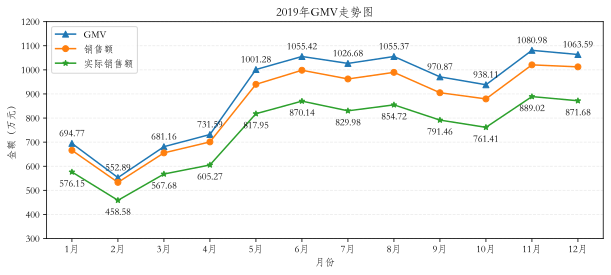

In [257]:
# 7. 每月GMV及趋势分析(折线图)
df['month'] = df.orderTime.dt.month
x = [f'{x}月' for x in range(1,13)]
gmv_ser = np.round(df.groupby('month').orderAmount.sum() / 10000, 2)
sales_ser = np.round(df.groupby('month').payment.sum() / 10000, 2)
real_ser = np.round(df[df.chargeback == '否'].groupby('month').payment.sum() / 10000, 2)

plt.figure(figsize = (10,4), dpi = 120)
plt.plot(x, gmv_ser, marker = '^', label = 'GMV')
plt.plot(x, sales_ser, marker = 'o', label = '销售额')
plt.plot(x, real_ser, marker = '*', label = '实际销售额')
# 添加文本数据便于解读
for i in range(12):
    plt.text(i,gmv_ser[i + 1] + 30, gmv_ser[i + 1], ha = 'center')
    plt.text(i,real_ser[i + 1] - 60, real_ser[i + 1], ha = 'center')
    
plt.yticks(np.arange(300,1201,100))
plt.xlabel('月份')
plt.ylabel('金额（万元）')
plt.title('2019年GMV走势图')
plt.legend()
plt.grid(axis = 'y', alpha = 0.25, linestyle = '--')
plt.show()

In [258]:
# !pip install pyecharts

In [259]:
# pyecharts绘制
import pyecharts.options as opts
from pyecharts.charts import Line

line_chart = Line(init_opts=opts.InitOpts(width="720px", height="360px"))
line_chart.add_xaxis(xaxis_data=x)
line_chart.add_yaxis(
    series_name="GMV",
    y_axis=gmv_ser
)
line_chart.add_yaxis(
    series_name="实际销售额",
    y_axis=real_ser
)
line_chart.add_yaxis(
    series_name="销售额",
    y_axis=sales_ser
)
line_chart.set_global_opts(
    title_opts=opts.TitleOpts(title="2019年GMV走势", subtitle=""),
    tooltip_opts=opts.TooltipOpts(trigger="axis"),
    xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    yaxis_opts=opts.AxisOpts(min_=300, max_=1200)
)
line_chart.render_notebook()

In [260]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

gmv_ser = df.groupby('chanelID').orderAmount.sum()
gmv_ser = gmv_ser.nlargest(10)
data = [
    [gmv_ser.index[i], np.round(gmv_ser.values[i] / 10000, 2)] 
    for i in range(gmv_ser.size)
]

pie_chart = Pie(init_opts=opts.InitOpts(width="600px", height="600px"))
pie_chart.add(
    "",
    data,
    radius="50%",
    center=["50%", "50%"],
)
pie_chart.set_global_opts(
    title_opts=opts.TitleOpts(title="GMV贡献Top10渠道"),
    legend_opts=opts.LegendOpts(type_="plain", pos_top="5%", orient="horizontal"),
)
pie_chart.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
pie_chart.render_notebook()

C:\Users\zs\AppData\Local\Temp/ipykernel_8508/3928421356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = (df.orderTime.dt.dayofweek + 1) % 7


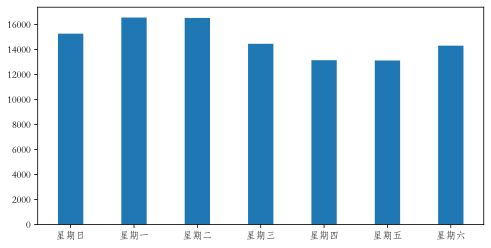

In [261]:
# 周一到周日哪天的下单量最高、哪个时段下单量最高（柱状图）
df['weekday'] = (df.orderTime.dt.dayofweek + 1) % 7
temp = pd.pivot_table(data = df,
              index = 'weekday',
              values = 'orderID',
              aggfunc = 'nunique')
temp
x = [f'星期{x}' for x in '日一二三四五六']
plt.figure(figsize = (8,4), dpi = 120)
plt.bar(x,temp['orderID'],0.4)
plt.show()

C:\Users\zs\AppData\Local\Temp/ipykernel_8508/2778389892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.orderTime.dt.floor('30T').dt.time


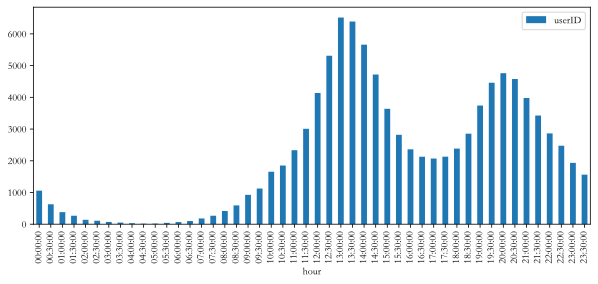

In [262]:
# 以30分钟为单位向下取整
df['hour'] = df.orderTime.dt.floor('30T').dt.time
temp = pd.pivot_table(data = df,
                     index = 'hour',
                     values = 'userID',
                     aggfunc = 'nunique')
# temp
temp.plot(kind = 'bar',figsize = (10,4))
plt.show()

In [263]:
# 去掉退货用户
df = df[df['chargeback'] == '否']
# 用户复购率
# 根据用户ID统计每月订单数量
temp = pd.pivot_table(data = df,
                     index = 'userID',
                     columns = 'month',
                     values = 'orderID',
                     aggfunc = 'nunique')
temp

month,1,2,3,4,5,6,7,8,9,10,11,12
userID,,,,,,,,,,,,
user-100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
user-100003,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
user-100007,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
user-299980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
user-299983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
user-299989,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [264]:
# 将复购（同一userID下orderID和大于1）记录值置为1（通过求和就可得知有多少复购人数），无复购记录记为0
def handle_data(x):
    if np.isnan(x):
        return x
    return 1 if x > 1 else 0

temp = temp.applymap(handle_data)
temp

month,1,2,3,4,5,6,7,8,9,10,11,12
userID,,,,,,,,,,,,
user-100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
user-100003,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
user-100007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
user-299980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
user-299983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
user-299989,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [265]:
# 复购率 = 复购人数 / 购买总人数
# 这里以一个月为窗口
# count()不会记录nan值，只会记录1和0.所以count就是由购买行为的用户数
rebuy_rate = temp.sum() / temp.count()
for i in range(12):
    print(f'{i+1}月复购率为：{rebuy_rate[i+ 1]:.4f}%')

1月复购率为：0.0147%
2月复购率为：0.0092%
3月复购率为：0.0158%
4月复购率为：0.0174%
5月复购率为：0.0264%
6月复购率为：0.0264%
7月复购率为：0.0208%
8月复购率为：0.0271%
9月复购率为：0.0219%
10月复购率为：0.0249%
11月复购率为：0.0269%
12月复购率为：0.0262%


### RFM 模型

In [266]:
df['F'] = 1   # 将每条购买购买记录F置为1，根据userID求和就是每个用户的购买次数
temp = pd.pivot_table(data = df,
                     index = 'userID',
                     values = ['F','orderTime','payment'],
                     aggfunc = {
                         'F':'sum',    # 每个用户购买次数
                         'orderTime':'max',
                         'payment':'sum'
                     })
temp['R'] = (temp.orderTime - datetime(2019,12,31)).dt.days   # R：最近一次购买时间，用负数，越大表示时间越近
temp['M'] = temp['payment']  # M：用户消费金额
temp = temp[['R','F','M']]
temp

C:\Users\zs\AppData\Local\Temp/ipykernel_8508/3718811938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F'] = 1   # 将每条购买购买记录F置为1，根据userID求和就是每个用户的购买次数


,R,F,M
userID,,,
user-100000,-79,1,1770.81
user-100003,-221,1,511.59
user-100006,-47,1,443.55
user-100007,-351,1,2162.14
user-100008,-45,1,4879.94
...,...,...,...
user-299980,-74,1,389.44
user-299983,-4,1,706.80
user-299989,-50,2,1637.47


In [267]:
temp.mean()   # 分别求平均
temp = temp.apply(lambda x: x - x.mean())   # 每列减本列均值
temp = temp.applymap(lambda x: '1' if x >0 else '0')   # 值为正数则标记为1，负数标记为0
temp

,R,F,M
userID,,,
user-100000,1,0,1
user-100003,0,0,0
user-100006,1,0,0
user-100007,0,0,1
user-100008,1,0,1
...,...,...,...
user-299980,1,0,0
user-299983,1,0,0
user-299989,1,1,1


In [268]:
def make_tag(model):
    tags ={
        '111': '重要价值客户',
        '101': '重要发展客户',
        '011': '重要保持客户',
        '001': '重要挽留客户',
        '110': '一般价值客户',
        '100': '一般发展客户',
        '010': '一般保持客户',
        '000': '一般挽留客户'
    }
    key = model['R'] + model['F'] + model['M']
    return tags.get(key)

temp['TAG'] = temp.apply(make_tag,axis=1)
temp

,R,F,M,TAG
userID,,,,
user-100000,1,0,1,重要发展客户
user-100003,0,0,0,一般挽留客户
user-100006,1,0,0,一般发展客户
user-100007,0,0,1,重要挽留客户
user-100008,1,0,1,重要发展客户
...,...,...,...,...
user-299980,1,0,0,一般发展客户
user-299983,1,0,0,一般发展客户
user-299989,1,1,1,重要价值客户


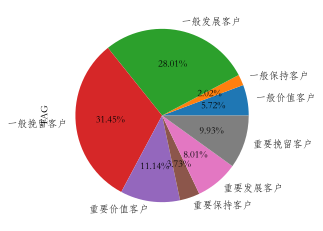

In [269]:
ser = temp.groupby('TAG').TAG.count()
ser.plot(kind = 'pie', autopct = '%.2f%%')
plt.show()

### 4. 数据分析报告撰写

1. Take away in 5 minutes
2. Never make your boss think
3. Think complex, speak simple
4. One point in one page